#Body Fat Analysis
Can we predict body fat percentage accurately using body measurements accessible at home and weight?

Data was downloaded from kaggle.com

The variables listed below, from left to right, are:

- Density determined from underwater weighing - Exluded as it is difficult to obtain at home
- Percent body fat from Siri's (1956) equation - to be predicted 
- Age (years)
- Weight (lbs) - converted to kg for the analysis
- Height (inches) - converted to cm for the analysis
- Neck circumference (cm)
- Chest circumference (cm)
- Abdomen 2 circumference (cm)
- Hip circumference (cm)
- Thigh circumference (cm)
- Knee circumference (cm)
- Ankle circumference (cm)
- Biceps (extended) circumference (cm)
- Forearm circumference (cm)
- Wrist circumference (cm)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
bodyfat = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/ML Projects/bodyfat.csv")

In [ ]:
df = bodyfat.copy()

In [ ]:
df = df.drop(labels='Density', axis = 1)

In [ ]:
df['Height'] = round(df['Height']*2.54, 1)
df['Weight'] = round(df['Weight']*0.453592, 2)

##Initial Data Review

In [ ]:
df.shape

(252, 14)

In [ ]:
df.head()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,69.97,172.1,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,78.58,183.5,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,69.85,168.3,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,83.80,183.5,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,83.57,181.0,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
df.describe()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,19.150794,44.884921,81.158452,178.176587,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,8.368740,12.602040,13.330783,9.305915,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.000000,22.000000,53.750000,74.900000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,12.475000,35.750000,72.117500,173.400000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,19.200000,43.000000,80.060000,177.800000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,25.300000,54.000000,89.360000,183.500000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,47.500000,81.000000,164.720000,197.500000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BodyFat  252 non-null    float64
 1   Age      252 non-null    int64  
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


In [ ]:
#setting formatting for the plots
plt.rc('font', size=12)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

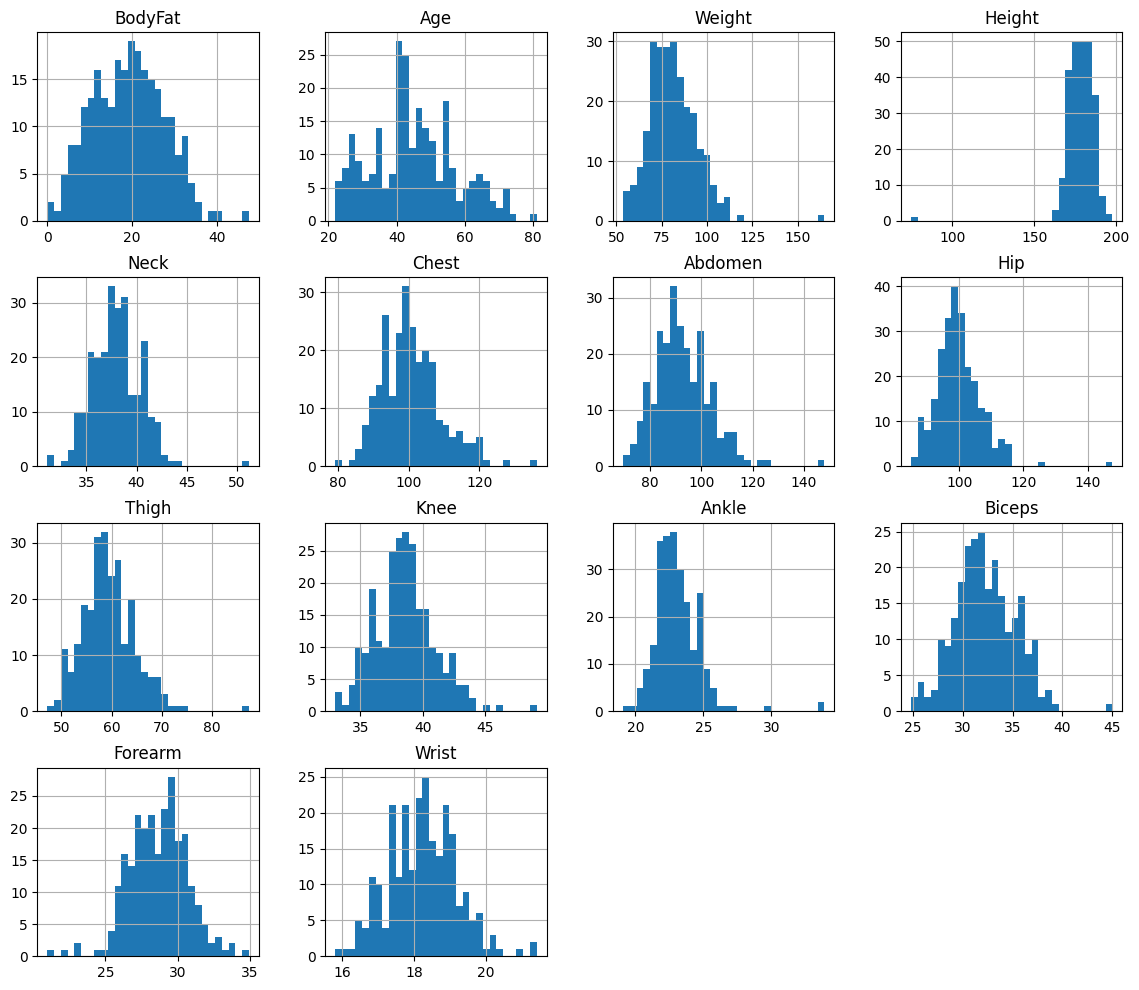

In [ ]:
df.hist(bins=30, figsize=(14, 12))
plt.show()

##Creating Test Set
80-20 Train-Test ratio

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=26)

In [ ]:
print(df_train.shape, df_test.shape)

(201, 14) (51, 14)


##Data Visualization and Exploratory Analysis

In [ ]:
df = df_train.copy()

Body Fat percentage based on Weight and Height

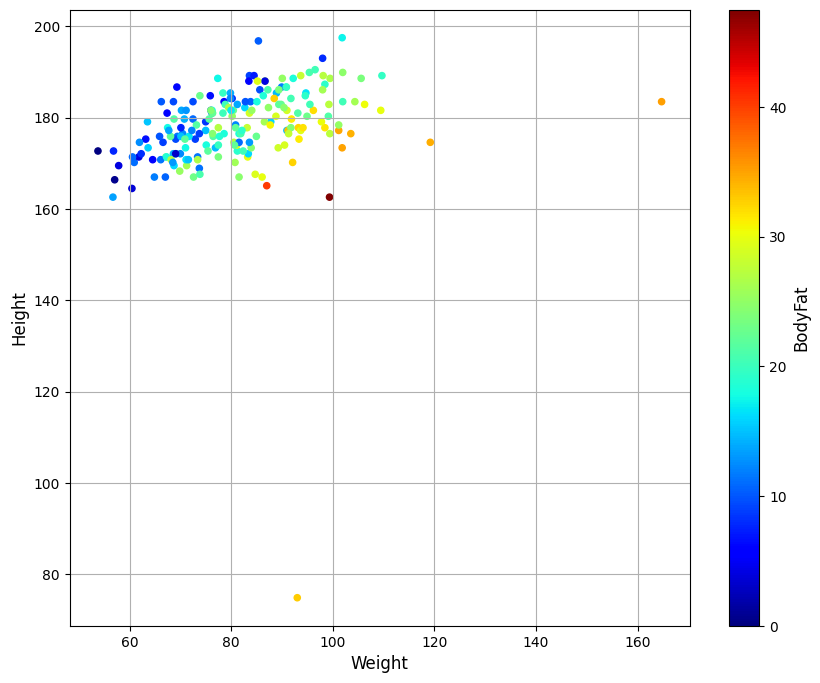

In [ ]:
df.plot(kind='scatter', x='Weight', y='Height', grid='True', c='BodyFat', cmap='jet', colorbar=True, legend=True, sharex=False, figsize=(10, 8))
plt.show()

BMI Calculation:

- Formula: weight (kg) / (height (m) )^2

- The formula for BMI is weight in kilograms divided by height in meters squared. If height has been measured in centimeters, divide by 100 to convert this to meters.

In [ ]:
#Adding BMI
df['BMI'] = df['Weight'] / pow((df['Height']/100), 2)

Body Fat vs. BMI

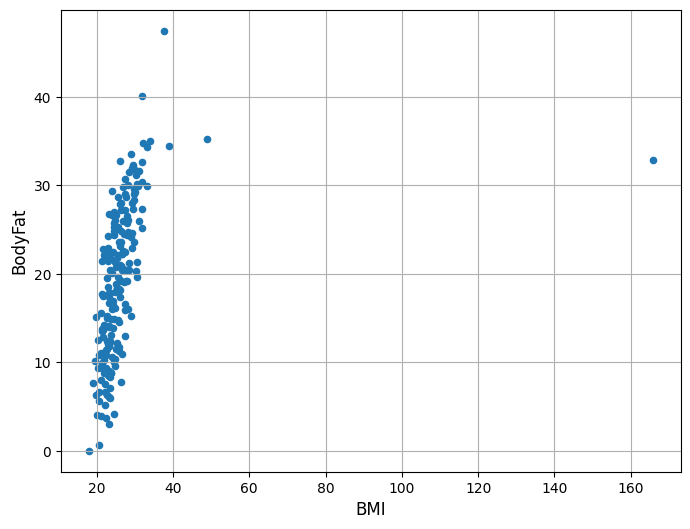

In [ ]:
df.plot(kind='scatter', x='BMI', y='BodyFat', grid='True', figsize=(8, 6))
plt.show()

##Looking for Correlations

In [ ]:
corr_matrix = df.corr()

In [ ]:
corr_matrix['BodyFat'].sort_values(ascending=False)

BodyFat    1.000000
Abdomen    0.817574
Chest      0.712886
Hip        0.638404
Weight     0.619033
Thigh      0.567282
Biceps     0.514619
Knee       0.511247
Neck       0.468893
Forearm    0.388738
BMI        0.364763
Wrist      0.320919
Ankle      0.312975
Age        0.282444
Height    -0.101667
Name: BodyFat, dtype: float64

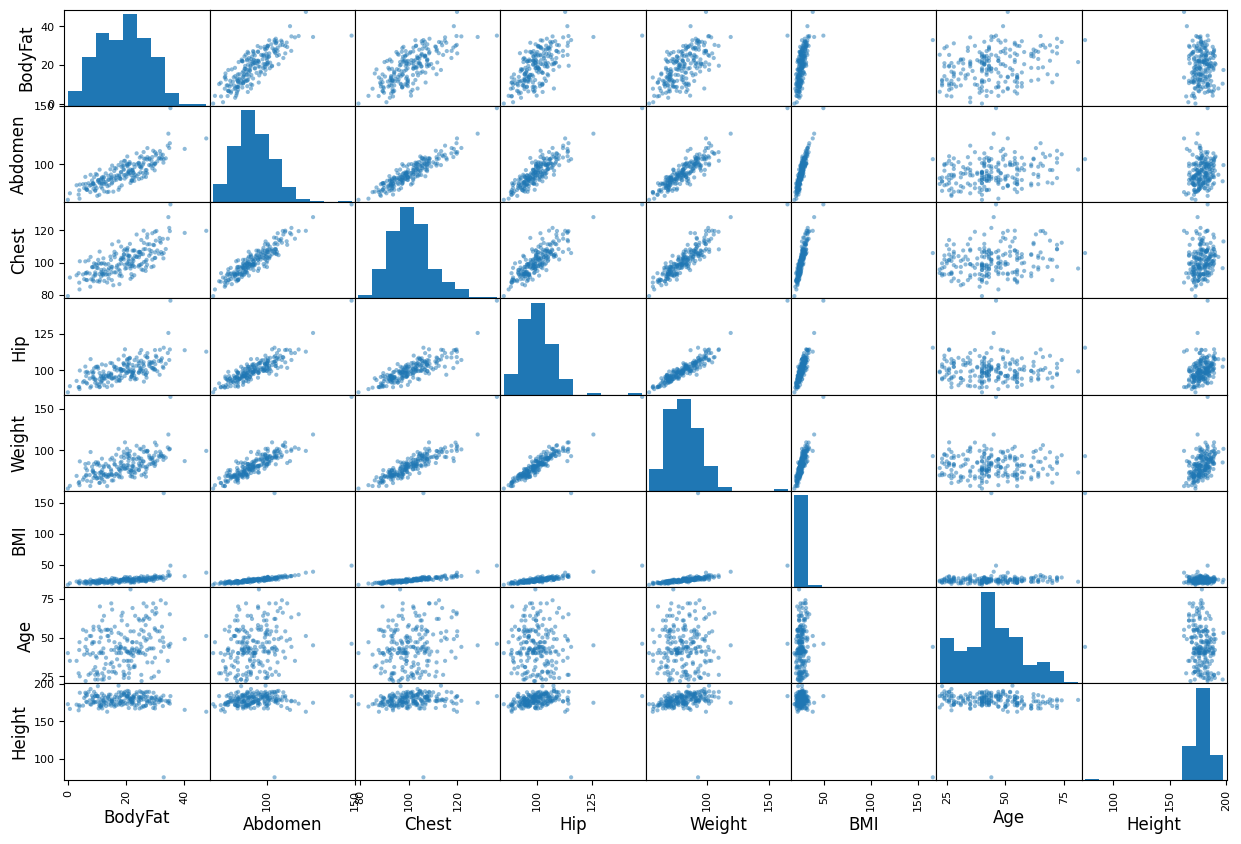

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['BodyFat', 'Abdomen', 'Chest', 'Hip', 'Weight', 'BMI', 'Age', 'Height']
scatter_matrix(df[attributes], figsize=(15, 10))
plt.show()

Body fat percentage appears to be strongly correlated with Abdomen and Chest measurements. 
However, it does not seem to be strongly correlated with the calculated BMI. 

##Preping Data for Machine Learning

In [ ]:
X_train = df_train.drop('BodyFat', axis=1)
y_train = df_train['BodyFat'].copy()

###Data Cleaning

####Missing Data - <font color=red>Included in Preprocessing Pipeline</font>

In [ ]:
null_rows_idx = X_train.isnull().any(axis=1)
X_train.loc[null_rows_idx].head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


In [ ]:
# No missing / NaN data. 
# If dataset contains missing data, we can either drop the missing rows or replace them with median
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy="median")

# Separating non-numerical columns, if there were any
# X_train_num = X_train.select_dtypes(include=[np.number])

# imputer.fit(X_train_ num)
# X = imputer.transform(X_train_num)

# X_train_impute = pd.DataFrame(X, columns=X_train_num.columns, index=X_train_num.index)

####Removing outliers - <font color=red>Not used currently</font>

In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=26)
outlier_pred = isolation_forest.fit_predict(X_train)

In [ ]:
outlier_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
# Outliers
X_train.iloc[outlier_pred == -1]

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
215,51,99.34,162.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
73,55,56.70,162.6,33.2,87.7,76.0,88.6,50.9,35.4,19.1,29.3,25.7,16.9
41,44,92.99,74.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
38,46,164.72,183.5,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
49,47,57.83,169.5,34.0,83.4,70.4,87.2,50.6,34.4,21.9,26.8,25.8,16.8
181,40,53.75,172.7,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5
247,70,60.89,170.2,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
40,45,119.18,174.6,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4
44,39,56.81,172.7,31.5,85.1,76.0,88.2,50.0,34.7,21.0,26.1,23.1,16.1
221,54,104.33,183.5,42.5,119.9,110.4,105.5,64.2,42.7,27.0,38.4,32.0,19.6


In [ ]:
X_train.iloc[outlier_pred == -1].shape

(12, 13)

In [ ]:
#Removing outliers from the training set
#X_train = X_train.iloc[outlier_pred == 1]
#y_train = y_train.iloc[outlier_pred == 1]

12 outliers identified. We have kept the outliers for now to capture a more diverse data

####Handling with Text and Categorical Data - <font color=red>Included in Preprocessing Pipeline</font>

There are no text / categorical data in this dataset. Otherwise can use either OrdinalEncore or Onehot Encoder

In [ ]:
# X_train_cat = X_train['which ever column that is not numerical']

# from sklearn.preprocessing import OrdinalEncoder

# ordinal_encoder = OrdinalEncoder()
# X_train_cat_encoded = ordinal_encoder.fit_transform(X_train_cat)


# from sklearn.preprocessing import OneHotEncoder

# cat_encoder = OneHotEncoder()
# X_train_cat_1hot = cat_encoder.fit_transform(X_train_cat)

####Feature Scaling - <font color=red>Included in Preprocessing Pipeline</font>

In [ ]:
# from sklearn.preprocessing import StandardScaler

# std_scaler = StandardScaler()
# X_train_std_scaled = std_scaler.fit_transform(X_train)

###Transformation Pipelines


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn import set_config

set_config(display='diagram')

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

In [ ]:
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
cat_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [ ]:
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d83df49a0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d83df4e20>)])

##Model Pipeline and Training

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=26))

In [ ]:
# Using Cross validation for linear and decision tree models
from sklearn.model_selection import cross_val_score

lin_rmses = -cross_val_score(lin_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=4)
tree_rmses = -cross_val_score(tree_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=4)

In [ ]:
pd.Series(lin_rmses).describe()

count    4.000000
mean     4.385891
std      0.217099
min      4.161927
25%      4.228130
50%      4.376048
75%      4.533809
max      4.629541
dtype: float64

In [ ]:
pd.Series(tree_rmses).describe()

count    4.000000
mean     5.840119
std      0.285276
min      5.568142
25%      5.647345
50%      5.790346
75%      5.983120
max      6.211643
dtype: float64

In [ ]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=26))

In [ ]:
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=26)),
])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=4,
    scoring='neg_root_mean_squared_error', random_state=26)

In [ ]:
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d83df49a0>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                Sim...
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d83df4e20>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=26))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2d816a9130>},
                   random_state=26, scoring='neg_root_mean_squared_error')

In [ ]:
# displaying random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round(decimals=6)
cv_res.head()

,max_features,split0,split1,split2,mean_test_rmse
1,18,4.681408,4.993736,4.627296,4.651001
4,15,4.681408,4.993736,4.627296,4.651001
8,15,4.681408,4.993736,4.627296,4.651001
9,19,4.681408,4.993736,4.627296,4.651001
0,8,4.494308,5.199212,4.718954,4.706833


In [ ]:
rnd_search.best_estimator_ 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d81660940>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d815f3760>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=18, random_state=26))])

Choosing linear regression as final model as it has the lowest error overall

In [ ]:
final_model = lin_reg.fit(X_train, y_train)

Feature importance based on linear regression model

In [ ]:
# feature_importances = rnd_search.best_estimator_ ["random_forest"].feature_importances_
feature_importances = final_model["linearregression"].coef_
sorted(zip(feature_importances,
           rnd_search.best_estimator_ ["preprocessing"].get_feature_names_out()),
           reverse=True)

[(10.601118664512885, 'pipeline-1__Abdomen'),
 (1.370026523582153, 'pipeline-1__Thigh'),
 (1.1962660724434653, 'pipeline-1__Forearm'),
 (0.8053119686106367, 'pipeline-1__Biceps'),
 (0.7774757273845582, 'pipeline-1__Age'),
 (0.13903635790645616, 'pipeline-1__Ankle'),
 (-0.023204135777871282, 'pipeline-1__Knee'),
 (-0.26600930727285066, 'pipeline-1__Height'),
 (-0.33772125442085343, 'pipeline-1__Chest'),
 (-1.4387961826628666, 'pipeline-1__Neck'),
 (-1.658877760107176, 'pipeline-1__Wrist'),
 (-1.6756634838871376, 'pipeline-1__Hip'),
 (-2.5596107161204853, 'pipeline-1__Weight')]

Looking at feature importance from random forest model (curiosity)

In [ ]:
feature_importances = rnd_search.best_estimator_ ["random_forest"].feature_importances_
sorted(zip(feature_importances,
           rnd_search.best_estimator_ ["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.7355154143983921, 'pipeline-1__Abdomen'),
 (0.03877833169374991, 'pipeline-1__Height'),
 (0.031792772204202534, 'pipeline-1__Weight'),
 (0.026355930565186318, 'pipeline-1__Neck'),
 (0.02577883997405297, 'pipeline-1__Knee'),
 (0.02424334082621165, 'pipeline-1__Hip'),
 (0.023998198198339617, 'pipeline-1__Wrist'),
 (0.018368526369060927, 'pipeline-1__Thigh'),
 (0.016664487196875428, 'pipeline-1__Ankle'),
 (0.016204693635875907, 'pipeline-1__Age'),
 (0.014730983834722683, 'pipeline-1__Biceps'),
 (0.014136156952655049, 'pipeline-1__Chest'),
 (0.013432324150674982, 'pipeline-1__Forearm')]

##Evaluate System on Test data

In [ ]:
from sklearn.metrics import mean_squared_error

X_test = df_test.drop("BodyFat", axis=1)
y_test = df_test["BodyFat"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

4.405274063697887


The test RMSE is comparable to what was calculated during training.

The 95% confidence interval for the test RMSE:

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([3.58341249, 5.09627649])